In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import *
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing the dataset

In [238]:
data_t=pd.read_csv("C:/Users/goura/Downloads/9961_14084_bundle_archive (1)/Train.csv")

In [239]:
data_t

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Exploratorary Data Analysis(EDA)


In [240]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


As there null enteries in the column of Item_weight and Outlet size, so in order to deal with this null values we will choose median and mode method in Item_weight and Outlet size respectively.

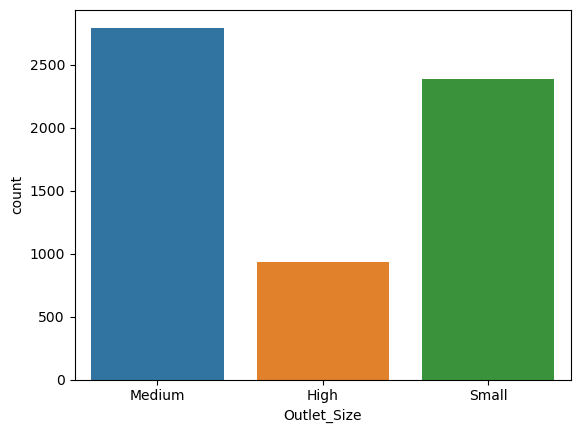

In [241]:
sns.countplot(x = "Outlet_Size", data = data_t)
plt.show()


Since now the mode of Outlet_Size is medium so we will replace null values by "Medium" 

In [242]:
data_t["Item_Weight"]=data_t["Item_Weight"].fillna(data_t["Item_Weight"].mean())

In [243]:
data_t["Outlet_Size"]=data_t["Outlet_Size"].fillna("Medium") # filling using mode

In [244]:
data_t.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [245]:
data_t["Outlet_Size"].count()

8523

In [246]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


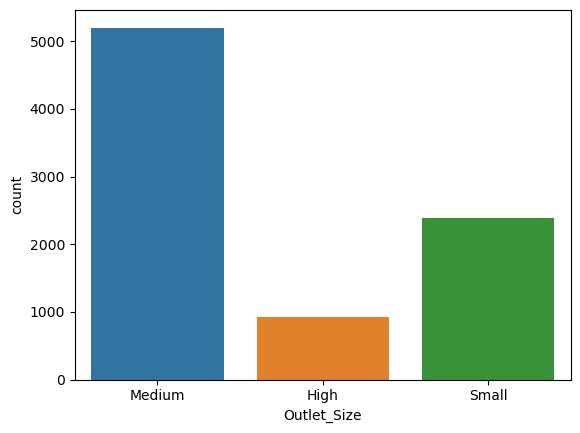

In [247]:
sns.countplot(x = "Outlet_Size", data = data_t)
plt.show()

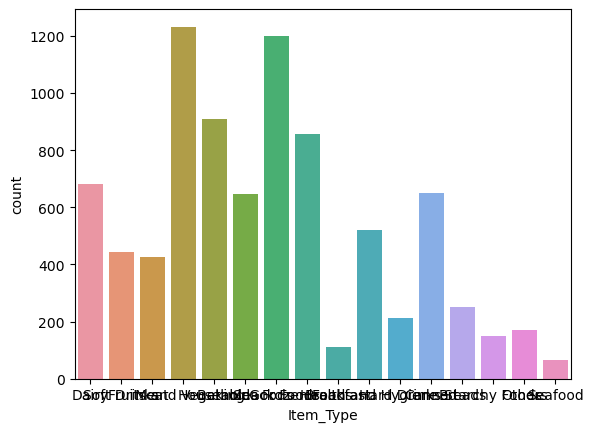

In [248]:
sns.countplot(x = "Item_Type", data = data_t)
plt.show()

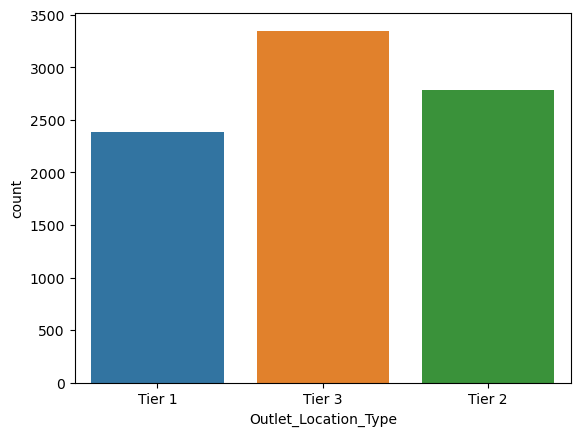

In [249]:
sns.countplot(x = "Outlet_Location_Type", data = data_t)
plt.show()

From the above graph it is clear that most stores are located in Tier 3 cities

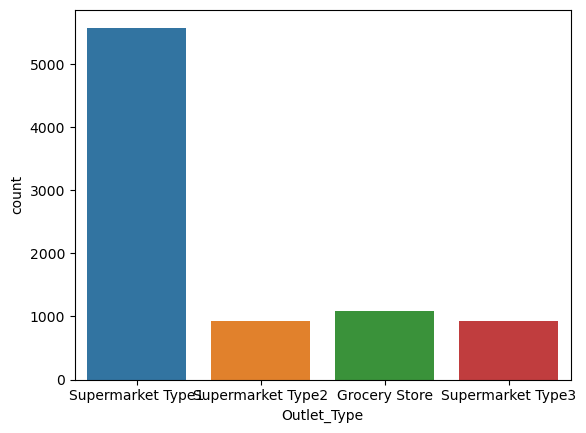

In [250]:
sns.countplot(x = "Outlet_Type", data = data_t)
plt.show()

most of the stores are of super market type 1

box plot of Item_Weight


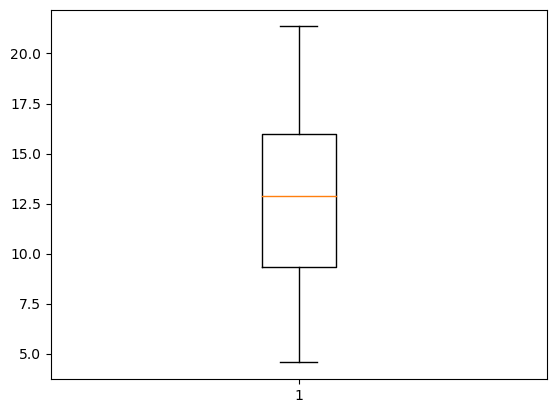

box plot of Item_Visibility


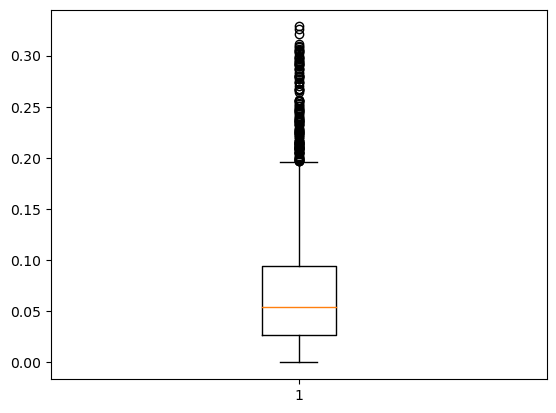

box plot of Item_MRP


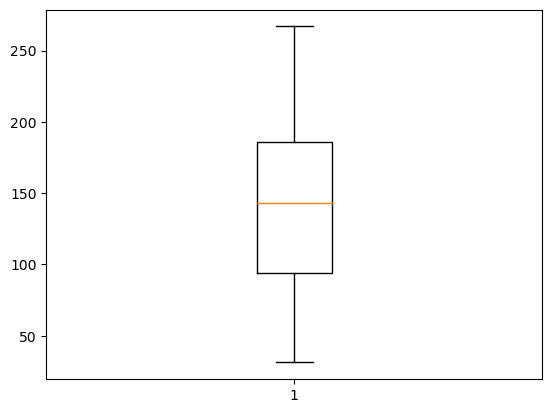

box plot of Outlet_Establishment_Year


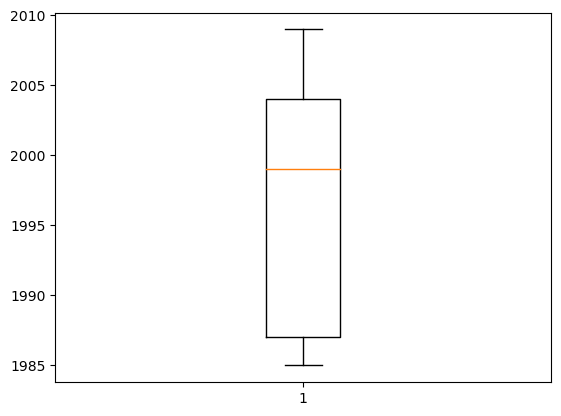

In [251]:
#box plot for checking outliers in continous data
lst1=["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year"]
for i in lst1:
    print("box plot of", i)
    plt.boxplot(data_t[i])
    plt.show()

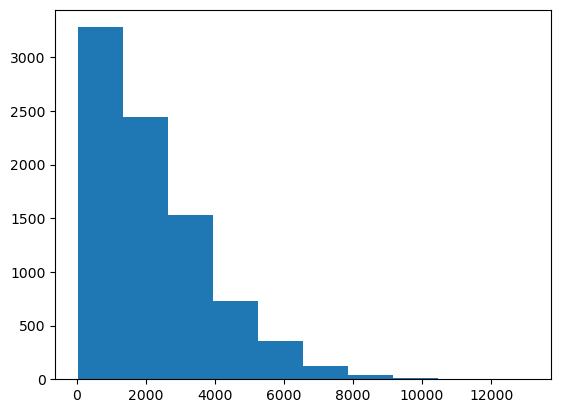

In [252]:
plt.hist(data_t["Item_Outlet_Sales"])
plt.show()

Since there are no outliers present in the data and visibility section do not provide much info about the variation in the data so we will remove


# Multivariate Analysis and Data preprocessing

In [253]:
data_t=data_t.replace({'Item_Fat_Content':{'Low Fat':1,'LF':1,'low fat':1,'reg':2,"Regular":2}})

In [254]:
data_t=data_t.drop(['Item_Identifier','Outlet_Identifier',"Item_Visibility"],axis=1)
data_t=pd.get_dummies(data_t,columns=['Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
data_t

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,1,249.8092,1999,3735.1380,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,5.920,2,48.2692,2009,443.4228,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,1,141.6180,1999,2097.2700,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,2,182.0950,1998,732.3800,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.930,1,53.8614,1987,994.7052,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,214.5218,1987,2778.3834,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,2,108.1570,2002,549.2850,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,10.600,1,85.1224,2004,1193.1136,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,2,103.1332,2009,1845.5976,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


                                  Item_Weight  Item_Fat_Content  Item_MRP  \
Item_Weight                      1.000000e+00         -0.021157  0.024756   
Item_Fat_Content                -2.115731e-02          1.000000  0.006063   
Item_MRP                         2.475610e-02          0.006063  1.000000   
Outlet_Establishment_Year       -8.300836e-03          0.003151  0.005020   
Item_Outlet_Sales                1.155000e-02          0.018719  0.567574   
Item_Type_Baking Goods          -3.259606e-02          0.083804 -0.067311   
Item_Type_Breads                -5.061184e-02          0.032643 -0.000112   
Item_Type_Breakfast             -1.958157e-03          0.065711  0.001460   
Item_Type_Canned                -3.114182e-02          0.073235 -0.005666   
Item_Type_Dairy                  3.292259e-02          0.021236  0.035551   
Item_Type_Frozen Foods           6.244951e-04          0.085041 -0.013358   
Item_Type_Fruits and Vegetables  2.953735e-02          0.116955  0.023688   

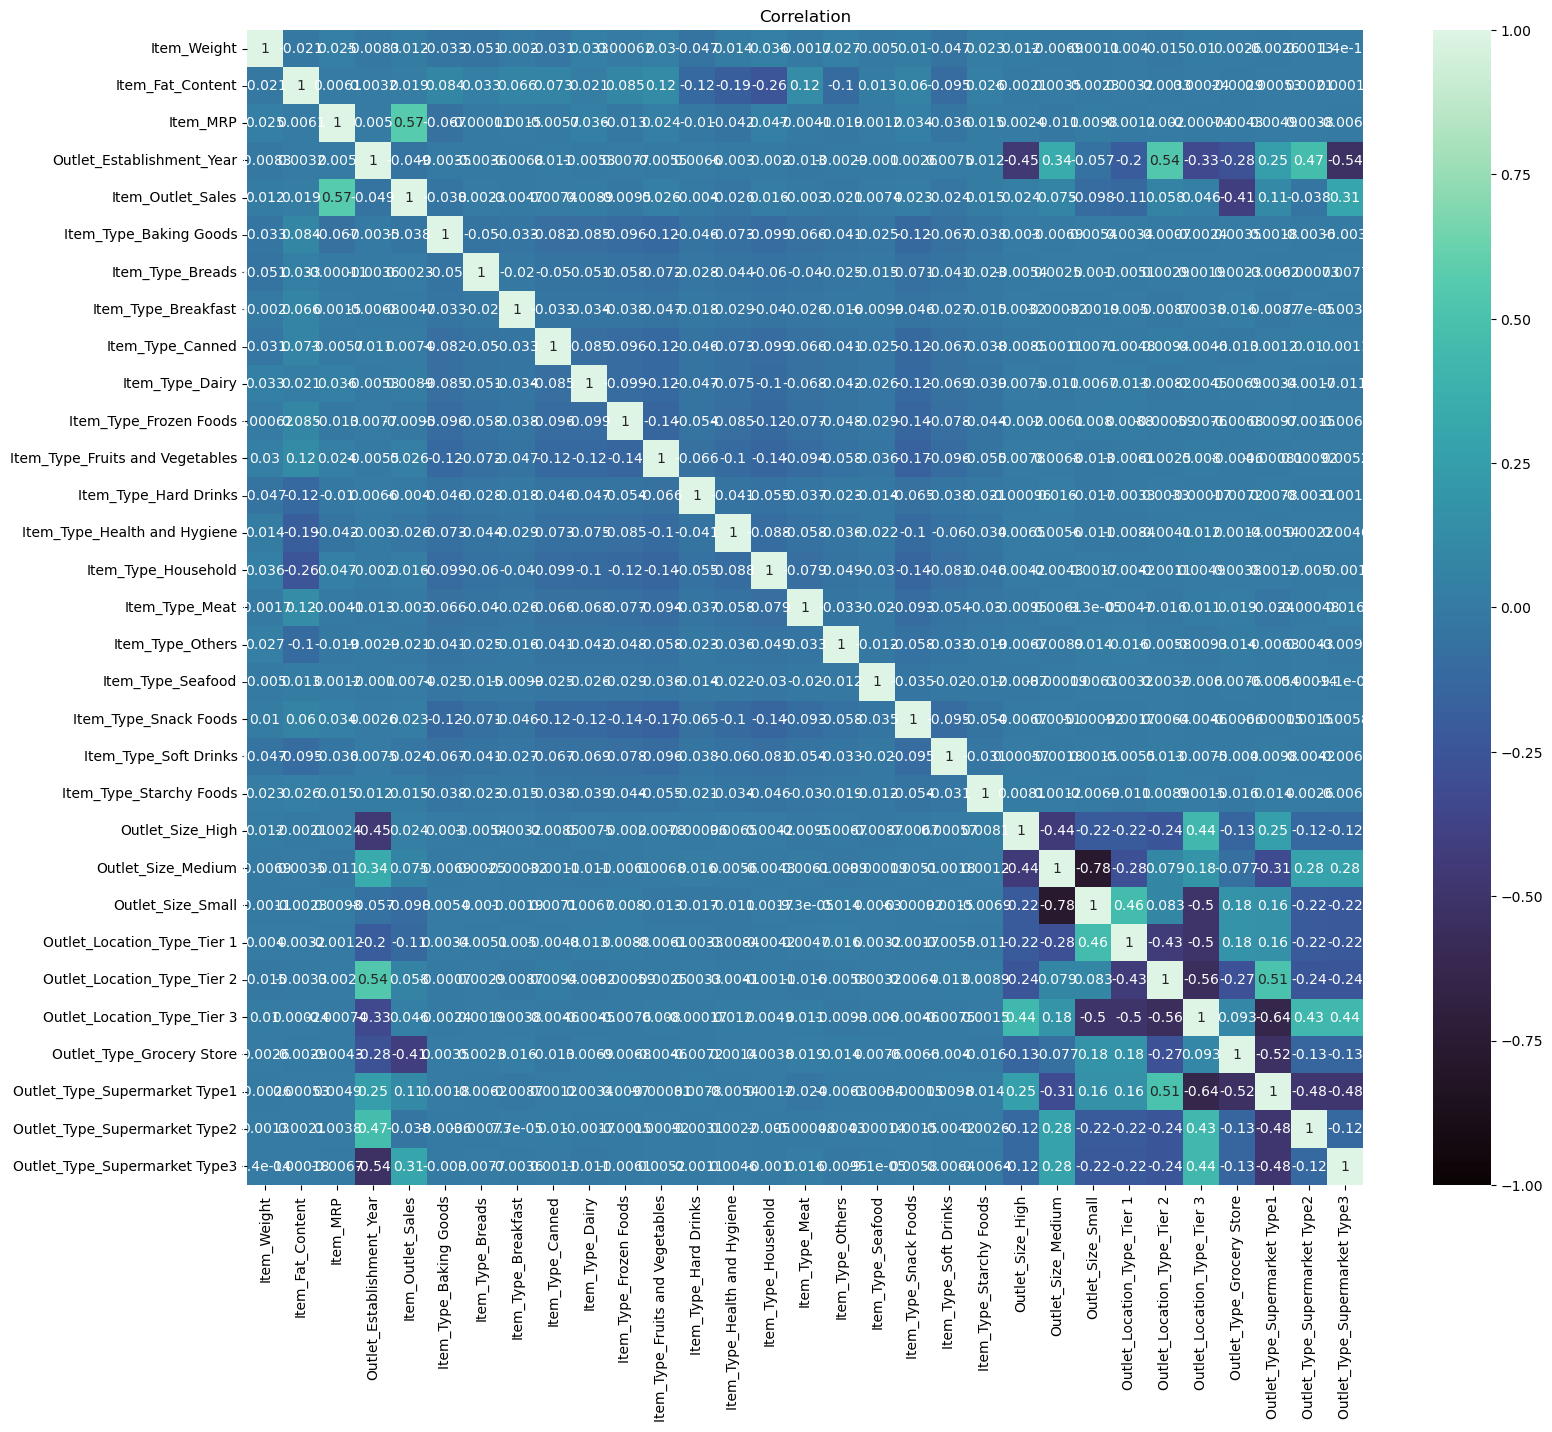

In [255]:
corr= data_t.corr()
print(corr)
#Plot heatmap
plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap ='mako')
plt.title('Correlation')
plt.show()

In [256]:

X= data_t.drop(['Item_Outlet_Sales'],axis=1)
Y=data_t["Item_Outlet_Sales"]

In [257]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int64  
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Type_Baking Goods           8523 non-null   uint8  
 6   Item_Type_Breads                 8523 non-null   uint8  
 7   Item_Type_Breakfast              8523 non-null   uint8  
 8   Item_Type_Canned                 8523 non-null   uint8  
 9   Item_Type_Dairy                  8523 non-null   uint8  
 10  Item_Type_Frozen Foods           8523 non-null   uint8  
 11  Item_Type_Fruits and Vegetables  8523 non-null   uint8  
 12  Item_Type_Hard Drink

In [258]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1 )

In [259]:
lr = LinearRegression()
model1=lr.fit(X_train,Y_train)

In [260]:
print(model1.intercept_, model1.coef_, model1.score(X, Y))

-73181.30413617768 [ 2.08585328e+00  3.06540289e+01  1.56656717e+01  3.67393907e+01
 -1.25079894e+01  4.27822383e+01  1.03443532e+01  8.39646053e+00
 -1.35885407e+02 -3.21813862e+01  2.20279509e+01 -3.21781787e+01
 -3.48788560e+00 -4.48574183e+01 -1.02686798e+00 -8.94425273e+01
  3.39026721e+02  1.90807454e+01 -1.14792700e+02  2.47018914e+01
  5.08122961e+02 -3.01588667e+02 -2.06534294e+02  1.98775327e+02
 -2.15628983e+01 -1.77212429e+02 -1.65962576e+03 -1.25620511e+02
 -4.10678641e+02  2.19592491e+03] 0.5627186667210601


In [261]:
randomf=RandomForestRegressor(n_estimators=200,random_state=42)

In [262]:
model2=randomf.fit(X_train,Y_train)


In [263]:
tree_regressor = DecisionTreeRegressor(random_state=42)

In [264]:
model3=tree_regressor.fit(X_train,Y_train)

In [265]:
gb_regressor = GradientBoostingRegressor()

In [266]:
model4=gb_regressor.fit(X_train,Y_train)

In [268]:
linear_pred = lr.predict(X_test)
tree_pred = tree_regressor.predict(X_test)
forest_pred = randomf.predict(X_test)
gb_pred=gb_regressor.predict(X_test)
linear_mse = mean_squared_error(Y_test, linear_pred)
tree_mse = mean_squared_error(Y_test, tree_pred)
forest_mse = mean_squared_error(Y_test, forest_pred)
gb_mse=mean_squared_error(Y_test, gb_pred)
linear_mae = mean_absolute_error(Y_test, linear_pred)
tree_mae = mean_absolute_error(Y_test, tree_pred)
forest_mae = mean_absolute_error(Y_test, forest_pred)

print("Mean Squared Error (MSE):")
print("Linear Regression:", linear_mse)
print("Decision Tree Regression:", tree_mse)
print("Random Forest Regression:", forest_mse)
print("gbRegression:", gb_mse)

print("\nMean Absolute Error (MAE):")
print("Linear Regression:", linear_mae)
print("Decision Tree Regression:", tree_mae)
print("Random Forest Regression:", forest_mae)

r2_lr = r2_score(Y_test, linear_pred)
r2_tree=r2_score(Y_test,tree_pred)
r2_forest=r2_score(Y_test,forest_pred)
r2_gb=r2_score(Y_test,gb_pred)
print("linear",r2_lr)
print("tree r2",r2_tree)
print("forest",r2_forest)
print("forest",r2_gb)

Mean Squared Error (MSE):
Linear Regression: 1261238.1747501355
Decision Tree Regression: 2356174.4045468364
Random Forest Regression: 1309626.2962622019
gbRegression: 1137543.6517195886

Mean Absolute Error (MAE):
Linear Regression: 835.6835180285533
Decision Tree Regression: 1052.5683495502542
Random Forest Regression: 792.2179193620036
linear 0.5664207616922858
tree r2 0.19001159012179725
forest 0.5497862470634378
forest 0.6089435604404648


# Conclusion:

Hence we conclude that the Random forest Regressor is a good model to fit into our data